# Regression and prediction
From Chapter 4 of `Practical Statistics for Data Scientists` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import os
import random

In [2]:
def populate_data(filename) :
    data_path = os.path.join(os.getcwd(), 'data') + '/' + filename
    df = pd.read_csv(data_path)
    print(df.info())
    print(df.head())
    return df

---
## `1.` Simple linear regression

`pefr` dataframe represents records of the followings:
- PEFR : Peak Expiratory Flow Rate (a measure of lung capacity)
- Exposure: The number of years a work was exposed to cotton dust

In [3]:
lung = populate_data('LungDisease.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB
None
   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1


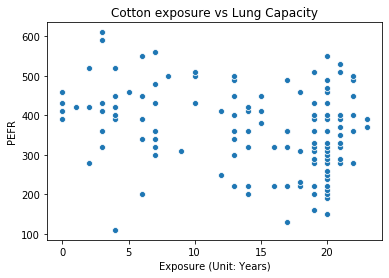

In [4]:
vis = sns.scatterplot(data=lung, x='Exposure', y='PEFR')

vis.set_title('Cotton exposure vs Lung Capacity')
vis.set_xlabel('Exposure (Unit: Years)')
plt.show()

---
### Fitting a model
The feature X is Exposure and the target Y is PEFR.

In [5]:
model = LinearRegression()

In [6]:
# Fitting the linear regression model
# Feature(s) must be in at least 2d-array
predictor = lung[['Exposure']] 
target = lung['PEFR']
model.fit(predictor, target) 

LinearRegression()

In [7]:
# Model results
print(f'Intercept: {model.intercept_:.4f}')
print(f'Coefficient: {model.coef_[0]:.4f}')

Intercept: 424.5828
Coefficient: -4.1846


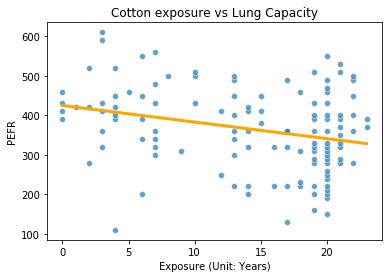

In [8]:
# Draw a regerssion line
b0 = model.intercept_
b1 = model.coef_
x = lung['Exposure']
y_pred = b0 + b1 * x 

sns.scatterplot(data=lung, x='Exposure', y='PEFR', alpha=0.7)
plt.plot(x, y_pred, c='orange', lw= 3)

plt.title('Cotton exposure vs Lung Capacity')
plt.xlabel('Exposure (Unit: Years)')
plt.show()

Without cotton exposure (Exposure = 0), PEFR is expected to be 424.58. Increase of Exposure by 1 year point is expected to cause the decrease of PEFR by -4.18.

---
### Fitted values and residuals
- Fitted values : predictions
- Residuals : errors

Regerssion equation should include an explicit error term $e_i$, as the fitted values does not generally exactly on a line. The simple linear regression is to calculate $b_0$ and $b_1$ based on the existing data to train (${X_i}$, ${Y_i}$)

<center>$Y_i = b_0 + b_1 * X_i + e_i$</center>

The fitted values (aka the predicted values) are typtically denoted by $\hat{Y}$ (Y-hat)

<center>$\hat{Y_i} = \hat{b_0} + \hat{b_1} * X_i$</center>

Residual is computed by substrating the predicted values from the original data.

<center>$\hat{e_i} = Y_i - \hat{Y_i}$</center>

Scikit-learn\'s LinearRegression model, `predict` method is used to return the fitted values.

In [9]:
y_predict = model.predict(predictor)
residuals = target - y_predict # target = lung['PEFR']

In [10]:
residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

---
### Least squares
The regression line is the e
stimate that minimizes the sum of squared residual values, or the _residual sum of squares (RSS)_. The method of minimizing the sum of the squared residuals is termed **`least squares`** or **`ordinary least squares(OLS)`** regression.

One important consideration is `least squares` are susceptible to outliers especially when dealing with small or moderate-sized data sets.

Also, regerssion itself does not explain the direction of causation, so the expertise into a subject must be supported.

---
## `2.` Multiple linear regression

`house_sales.csv` file is relatively bigger than others and should use a seperater (\t)

In [11]:
house = pd.read_csv('data/house_sales.csv', sep='\t')
house.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False


In [12]:
house.describe()

,SalePrice,PropertyID,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode
count,2.268900e+04,2.268900e+04,22689.000000,22689.000000,2.268900e+04,22689.000000,2.268900e+04,22689.000000,22689.000000,22689.000000,22689.000000,22689.000000,22689.000000,22689.000000,22689.000000,2.268900e+04,2.268900e+04,22689.000000
mean,5.079373e+05,4.666067e+09,392178.046631,0.901144,5.652523e+05,1.018820,1.174621e+04,2080.258275,293.240072,2.176550,3.367843,7.680991,1971.194588,102.305743,0.205783,2.203320e+05,3.004871e+05,98074.241174
std,3.466495e+05,2.877594e+09,36351.442162,0.083528,3.854195e+05,0.159745,2.901475e+04,913.791565,439.449560,0.768044,0.904414,1.180565,30.315556,440.560634,0.554195,1.829144e+05,2.266145e+05,591.396594
min,3.000000e+03,1.000102e+06,311600.000000,0.715993,3.368000e+03,1.000000,4.940000e+02,370.000000,0.000000,0.000000,0.000000,3.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9800.000000
25%,3.250000e+05,2.212400e+09,360700.000000,0.828814,3.605630e+05,1.000000,4.800000e+03,1420.000000,0.000000,1.750000,3.000000,7.000000,1950.000000,0.000000,0.000000,1.070000e+05,1.720000e+05,98034.000000
50%,4.246500e+05,4.006000e+09,403200.000000,0.926471,4.713150e+05,1.000000,7.200000e+03,1910.000000,0.000000,2.250000,3.000000,7.000000,1977.000000,0.000000,0.000000,1.820000e+05,2.460000e+05,98065.000000
75%,5.850000e+05,7.417700e+09,421200.000000,0.967831,6.494430e+05,1.000000,9.794000e+03,2540.000000,580.000000,2.500000,4.000000,8.000000,2000.000000,0.000000,0.000000,2.670000e+05,3.610000e+05,98117.000000
max,1.100000e+07,9.906000e+09,435200.000000,1.000000,1.164486e+07,5.000000,1.024068e+06,10740.000000,3500.000000,8.000000,33.000000,13.000000,2015.000000,2016.000000,3.000000,5.538000e+06,5.772000e+06,98354.000000


### Fitting the model

In [13]:
# house.columns.values
features= ['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade']
response = 'AdjSalePrice'

In [14]:
house_lm = LinearRegression()
house_lm.fit(house[features], house[response])

LinearRegression()

In [15]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print(f'Coefficent: ')
for feature, coef in zip(features, house_lm.coef_) :
    print(f'{feature} : {coef}')

Intercept: -521924.722
Coefficent: 
SqFtLot : -0.06050600921000202
SqFtTotLiving : 228.83210707273244
Bathrooms : -19438.09895978911
Bedrooms : -47781.153377023256
BldgGrade : 106117.20955540458


### Assessing the model
The performance metric to measure the overall accuracy :

**`root mean sqaured error (RMSE)`** : the square root of the average squared error in the prediced values
**`residual standard error (RSE)`** : similar to RMSE but adjusted for degree of freedom. So the denominator is degree of freedom (n-p-1) where p is number of predictors.

Particularly for big data applications, the difference between RMSE and RSE is very small.

Scikit-learn : `mean_squared_error` to get RMSE & `r2_score` for the coefficient of determination.

In [16]:
fitted = house_lm.predict(house[features]) # fit the training data
RMSE = np.sqrt(mean_squared_error(house[response], fitted))
r2 = r2_score(house[response], fitted)
print(f'RMSE: {RMSE:.4f}')
print(f'R_squared: {r2:.4f}')

RMSE: 261209.6916
R_squared: 0.5407


Statsmodel: A more detailed analysis

In [17]:
model = sm.OLS(house[response], house[features].assign(const=1)) # assign intercept = 1

In [18]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:48   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtLot          -0.0605      0.061     -0.989      0.323      -0.180       0.059
SqFtTotLiving   228.8321      3.898     58.699      0.000     221.191     236.473
Bathrooms     -1.944e+04   3625.219     -5.362      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.778e+04   2489.443    -19.194      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.136     44.287      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.349      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29679.186   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19394127.212
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.565   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Imterpretation of R_squared score : the features account for 54.1% of variation in Adjusted Sales Price. Also the t-statistic and the p-value measure the extent to which a coefficient is 'statistically sigificant.' The higher t-statistic(the lower p-value) the more significant the predictor(s).

---
### Cross-validation
R_squared, F-statistics and p-values are applied to the same data. However, it may not be useful when building a model to predict the response with `out-of-sample` data.

Cross validation methods, like k-fold, can help make up for the shortcomings from `in-sample` metrics.

---
### Model selection and stepwise regression

In [19]:
#house.info()

In [20]:
full_features = [
    'SqFtLot','SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
    'BldgGrade', 'YrBuilt', 'YrRenovated', 'NbrLivingUnits', 
    'PropertyType', 'NewConstruction'
]

In [21]:
# PropertyType and NewConstruction is categorial and boolean variables
# Need encoding into numbers
X = pd.get_dummies(house[full_features], drop_first=True) # avoid multicollinearity

In [22]:
X['NewConstruction'] = X['NewConstruction'].map({False:0, True:1})

In [23]:
# Confirm PropertyType and NewConstruction converted 
# X.describe() 

In [24]:
house_full = sm.OLS(house[response], X.assign(const=1))
results = house_full.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2772.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:36:48   Log-Likelihood:            -3.1378e+05
No. Observations:               22689   AIC:                         6.276e+05
Df Residuals:                   22676   BIC:                         6.277e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtLot                        0.0770      0.058      1.329      0.184      -0.037       0.191
SqFtTotLiving                198.6311      4.233     46.922      0.000     190.334     206.928
SqFtFinBasement                7.0494      4.627      1.524      0.128      -2.020      16.119
Bathrooms                   4.286e+04   3808.013     11.256      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.189e+04   2396.632    -21.652      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2440.995     56.243      0.000    1.33e+05    1.42e+05
YrBuilt                    -3573.7824     77.220    -46.281      0.000   -3725.139   -3422.426
YrRenovated                   -2.5194      3.924     -0.642      0.521     -10.210       5.171
NbrLivingUnits              5765.1825   1.76e+04      0.328      0.743   -2.87e+04    4.02e+04
NewConstruction            -2440.7694   5935.656     -0.411      0.681   -1.41e+04    9193.524
PropertyType_Single Family  2.996e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.279e+04    2.7e+04      3.436      0.001    3.99e+04    1.46e+05
const                       6.181e+06   1.55e+05     39.900      0.000    5.88e+06    6.48e+06
==============================================================================
Omnibus:                    31008.164   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26253527.214
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.981   Cond. No.                     2.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is <span style="color:red">**very important**</span> to note that additional features will lead to the increase of R_score and the decrease of RMSE. Therefore the use of these metrics do not explain if the additional features help the model choice.

One of the alternative ways is to apply **adjusted $R^2$** (adjusted for degree of freedom) and **AIC (Akaike's Informative Criteria, or its variants)**, which are use to penalize more extra variables. 

What stepwise regression can do is to add/drop predictors that optimize **adjusted $R^2$** and **AIC**. No implementation avaiable in Scikit-learn. 

However, stepwise regression and all subset regression are in-sample methods, which mean they are subject to overfitting - creating some performance issue. To avoid this, the common appoarch is to use **`cross-validation`**

---
### Weighted regression
It is advised by the data owner that the older the date the less reliable the data is, which makes sense. Therefore, each record (row) will be weighted differently in accordance with the date. 

To achieve this, `LinearRegression()` class contains **`sample_weight`** parameter when fitting the model, and it requires a column of weight data for each individual record.

In [33]:
house['Year'] = house['DocumentDate'].str.split('-').str[0]
house['Year'].value_counts()

2006    8176
2007    4928
2008    2355
2009    1879
2010    1711
2011    1260
2012    1000
2013     766
2014     458
2015     156
Name: Year, dtype: int64

In [36]:
# Start from 2006 with the weight of 1, which will grow by 1 for extra one year
house['Weight'] = house['Year'].astype(int) - 2005

In [39]:
# house.columns.values
features= ['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade']
response = 'AdjSalePrice'

In [42]:
# Fitting the model 
model_wt = LinearRegression() # no standardization applied
model_wt.fit(house[features], house[response], sample_weight=house['Weight'])

LinearRegression()